In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [2]:
df_stocks = pd.read_pickle(r'C:\Users\sweth\Desktop\lor\i20\booksnew\text books\cs664\spam 2\StockPredictions-master\Data\Pickled ten year filtered data (Articles + DJIA).pkl')

In [3]:
df_stocks

,close,adj close,articles
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
2007-01-06,12406.503255,12406.503255,. A Status Quo Secretary General. Best Buy and...
2007-01-07,12414.996745,12414.996745,. THE COMMON APPLICATION; Typo.com. Jumbo Bonu...
2007-01-08,12423.490234,12423.490234,. VW Group’s Sales Rose Sharply in 2006. Conso...
2007-01-09,12416.599609,12416.599609,. The Claim: Hot Leftovers Should Cool at Roo...
2007-01-10,12442.160156,12442.160156,. Love Among the Ruins. Dell Says Plant a Tree...


In [4]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [5]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [6]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_stocks

,prices,articles
2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
2007-01-06,12406,A Status Quo Secretary General. Best Buy and ...
2007-01-07,12414,THE COMMON APPLICATION; Typo.com. Jumbo Bonus...
2007-01-08,12423,VW Group’s Sales Rose Sharply in 2006. Consol...
2007-01-09,12416,The Claim: Hot Leftovers Should Cool at Room...
2007-01-10,12442,"Love Among the Ruins. Dell Says Plant a Tree,..."


In [8]:
df = df_stocks[['prices']].copy()
df

,prices
2007-01-01,12469
2007-01-02,12472
2007-01-03,12474
2007-01-04,12480
2007-01-05,12398
2007-01-06,12406
2007-01-07,12414
2007-01-08,12423
2007-01-09,12416
2007-01-10,12442


In [9]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [10]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sweth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()
for date, row in df_stocks.T.iteritems():
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles'])
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print(df_stocks.loc[date, 'articles'])
        print(date)

C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [12]:
df

,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8179,0.114,0.787,0.099
2007-01-03,12474,-0.9993,0.198,0.737,0.065
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
2007-01-06,12406,-0.965,0.134,0.771,0.094
2007-01-07,12414,-0.9975,0.193,0.739,0.069
2007-01-08,12423,-0.9601,0.11,0.793,0.097
2007-01-09,12416,-0.9953,0.103,0.848,0.049
2007-01-10,12442,-0.9534,0.134,0.743,0.123


In [83]:
train_start_date = '2007-01-01'
train_end_date = '2013-12-31'
test_start_date = '2014-01-01'
test_end_date = '2016-12-31'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]

In [84]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [85]:
numpy_df_train

array([[0.159, 0.093],
       [0.114, 0.099],
       [0.198, 0.065],
       ...,
       [0.14 , 0.065],
       [0.15 , 0.044],
       [0.168, 0.101]])

In [86]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    #sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [87]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [88]:
y_train

,prices
2007-01-01,12469
2007-01-02,12472
2007-01-03,12474
2007-01-04,12480
2007-01-05,12398
2007-01-06,12406
2007-01-07,12414
2007-01-08,12423
2007-01-09,12416
2007-01-10,12442


In [89]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

gnb = GaussianNB()
gnb.fit(numpy_df_train,y_train)
target_pred = gnb.predict(numpy_df_test)
accuracy = gnb.score(numpy_df_train,y_train)*100

C:\Users\sweth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
accuracy

63.0817364098553

In [91]:
target_pred

array([ 8443, 11613, 15971, ..., 13815, 14539,  8494], dtype=int64)

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=target_pred[0:], index = idx, columns=['prices'])

In [94]:
predictions_df['Week_Number'] = predictions_df.index.strftime('%U')
predictions_df['actual'] = y_test

In [95]:
predictions_df

,prices,Week_Number,actual
2014-01-01,8443,00,16509
2014-01-02,11613,00,16441
2014-01-03,15971,00,16469
2014-01-04,13359,00,16455
2014-01-05,12247,01,16440
2014-01-06,13418,01,16425
2014-01-07,13596,01,16530
2014-01-08,15010,01,16462
2014-01-09,12107,01,16444
2014-01-10,12422,01,16437


In [96]:
df_0 = predictions_df[['Week_Number', 'prices', 'actual']]
df_0.index = range(len(predictions_df))
df_grouped0 = df_0.groupby(['Week_Number'])['prices','actual'].agg([np.mean])
df_grouped0.reset_index(['Week_Number'], inplace=True)

In [97]:
df_grouped0

,Week_Number,prices,actual
,,mean,mean
0,00,11469.000000,17099.777778
1,01,12321.142857,16961.142857
2,02,12259.000000,16726.380952
3,03,11771.190476,16601.714286
4,04,12083.380952,16437.000000
5,05,12237.000000,16505.142857
6,06,11955.476190,16610.714286
7,07,11681.095238,16827.285714
8,08,12122.238095,16992.142857


Text(0,0.5,'Stock Prices')

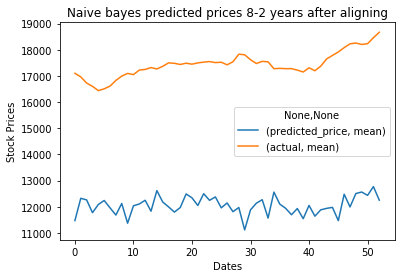

In [98]:
ax = df_grouped0.rename(columns={"prices": "predicted_price"}).plot(title='Naive bayes predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
#fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
#fig.savefig("graphs/naive bayes with aligning.png")

In [99]:
rfr = RandomForestRegressor()
rfr.fit(numpy_df_train,y_train)
accuracy1 = rfr.score(numpy_df_train,y_train)*100

C:\Users\sweth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [100]:
accuracy1

68.19752371685921

In [101]:
prediction, bias, contributions = ti.predict(rfr, numpy_df_test)

In [102]:
prediction

array([[ 9958.1],
       [ 9503.7],
       [12833.8],
       ...,
       [13136.5],
       [15091.2],
       [10929.2]])

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

In [105]:
predictions_df1['Week_Number'] = predictions_df1.index.strftime('%U')
predictions_df1['actual'] = y_test

In [106]:
predictions_df1

,prices,Week_Number,actual
2014-01-01,9958.100000,00,16509
2014-01-02,9503.700000,00,16441
2014-01-03,12833.800000,00,16469
2014-01-04,13350.100000,00,16455
2014-01-05,11848.900000,01,16440
2014-01-06,12285.500000,01,16425
2014-01-07,13095.900000,01,16530
2014-01-08,10653.700000,01,16462
2014-01-09,10165.100000,01,16444
2014-01-10,11210.600000,01,16437


In [107]:
df_1 = predictions_df1[['Week_Number', 'prices', 'actual']]
df_1.index = range(len(predictions_df1))
df_grouped1 = df_1.groupby(['Week_Number'])['prices','actual'].agg([np.mean])
df_grouped1.reset_index(['Week_Number'], inplace=True)

In [108]:
df_grouped1

,Week_Number,prices,actual
,,mean,mean
0,00,11676.892593,17099.777778
1,01,12377.230556,16961.142857
2,02,12376.306190,16726.380952
3,03,11774.159524,16601.714286
4,04,11713.722937,16437.000000
5,05,12213.048175,16505.142857
6,06,11879.598231,16610.714286
7,07,11849.048571,16827.285714
8,08,12110.441349,16992.142857


Text(0,0.5,'Stock Prices')

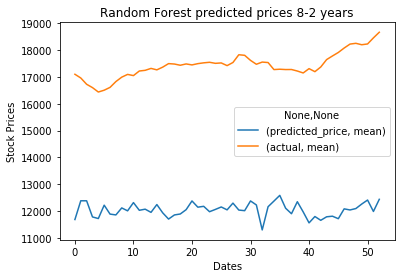

In [109]:
ax = df_grouped1.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
#fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()

In [110]:
mlpc = MLPClassifier(hidden_layer_sizes=(150,), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc.fit(numpy_df_train, y_train)   
prediction3 = mlpc.predict(numpy_df_test)

C:\Users\sweth\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
prediction3

array([12684, 12381, 12569, ..., 12548, 12213,  8494], dtype=int64)

In [114]:
idx = pd.date_range(test_start_date, test_end_date)
predictions_df3 = pd.DataFrame(data=prediction3[0:], index = idx, columns=['prices'])

In [115]:
predictions_df3

,prices
2014-01-01,12684
2014-01-02,12381
2014-01-03,12569
2014-01-04,13359
2014-01-05,15470
2014-01-06,11539
2014-01-07,13596
2014-01-08,13000
2014-01-09,13424
2014-01-10,13090


In [116]:
predictions_df3['Week_Number'] = predictions_df3.index.strftime('%U')
predictions_df3['actual'] = y_test

In [117]:
predictions_df3

,prices,Week_Number,actual
2014-01-01,12684,00,16509
2014-01-02,12381,00,16441
2014-01-03,12569,00,16469
2014-01-04,13359,00,16455
2014-01-05,15470,01,16440
2014-01-06,11539,01,16425
2014-01-07,13596,01,16530
2014-01-08,13000,01,16462
2014-01-09,13424,01,16444
2014-01-10,13090,01,16437


In [118]:
df_2 = predictions_df3[['Week_Number', 'prices', 'actual']]
df_2.index = range(len(predictions_df3))
df_grouped = df_2.groupby(['Week_Number'])['prices','actual'].agg([np.mean])
df_grouped.reset_index(['Week_Number'], inplace=True)

In [119]:
df_grouped

,Week_Number,prices,actual
,,mean,mean
0,00,12735.000000,17099.777778
1,01,12758.761905,16961.142857
2,02,12431.476190,16726.380952
3,03,11891.428571,16601.714286
4,04,12599.142857,16437.000000
5,05,11647.857143,16505.142857
6,06,12684.000000,16610.714286
7,07,12300.666667,16827.285714
8,08,12797.714286,16992.142857


Text(0,0.5,'Stock Prices')

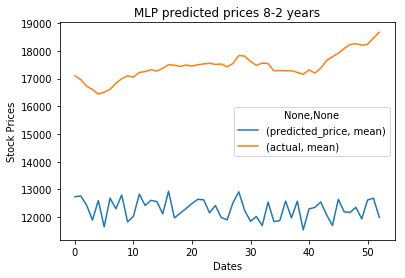

In [120]:
ax = df_grouped.rename(columns={"prices": "predicted_price"}).plot(title='MLP predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
#fig = df_grouped.rename(columns={"actual": "actual_price"}).plot().get_figure()

In [121]:
predictions_df

,prices,Week_Number,actual
2014-01-01,8443,00,16509
2014-01-02,11613,00,16441
2014-01-03,15971,00,16469
2014-01-04,13359,00,16455
2014-01-05,12247,01,16440
2014-01-06,13418,01,16425
2014-01-07,13596,01,16530
2014-01-08,15010,01,16462
2014-01-09,12107,01,16444
2014-01-10,12422,01,16437
